# K-Nearest Neighbors

In [1]:
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier

## Finding a Observation's Nearest Neighbors

In [2]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
standard = StandardScaler()
features_standard = standard.fit_transform(features)
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standard)
new_observation = [1,1,1,1]
distance, indices = nearest_neighbors.kneighbors([new_observation])
features_standard[indices], distance, indices

(array([[[1.03800476, 0.55861082, 1.10378283, 1.18556721],
         [0.79566902, 0.32841405, 0.76275827, 1.05393502]]]),
 array([[0.49140089, 0.74294782]]),
 array([[124, 110]], dtype=int64))

In addition, we can use kneighbor_graph to create a matrix indicating each observation's nearest neighbors

In [3]:
nearest_neighbors = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(features_standard)
nerest_neighbors_with_self = nearest_neighbors.kneighbors_graph(features_standard).toarray()
# remove 1's marking an observation is nearest neighbor to itself
for i, x in enumerate(nerest_neighbors_with_self):
    x[i] = 0

In [4]:
nerest_neighbors_with_self[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Creating a K-Nearest Neighbor Classifier

In [5]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(features_standard, target)
new_observation = [[0.75]*4, [1]*4]
knn.predict(new_observation)

array([1, 2])

In [6]:
knn.predict_proba(new_observation)

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

## Identifying the Best Neighborhood Size

In [7]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
pipe = Pipeline([("standardizer", standard),("knn", knn)])
search_space = [{'knn__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}]
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(features_standard, target)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

6

## Creating a Radius-Based Nearest Neighbors Classifier

In [8]:
rnn = RadiusNeighborsClassifier(radius=.5, n_jobs=-1).fit(features_standard, target)
new_observation = [[1]*4]
rnn.predict(new_observation)

array([2])

Useful parameter `outlier_label` Wich indicates what label to give an observation that has no observations within the radius -- which is can also be a useful tool for identifying outliers

## Mechanism Of K-Nearest Neighbor

In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import heapq
import collections

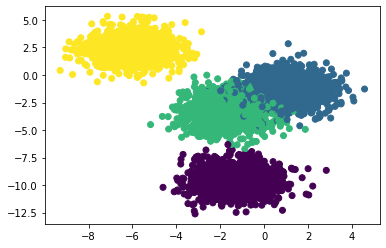

In [29]:
features, target = make_blobs(n_samples=5000, centers=4, random_state=2)
plt.scatter(features[:,0], features[:,1],c=target)

In [9]:
def distance(start_point: np.ndarray, end_point: np.ndarray, dimension):
    if dimension == 1:
        return np.sum(np.abs(start_point-end_point))
    elif dimension == np.Inf:
        return np.max(np.abs(start_point-end_point))
    elif dimension < 1:
        raise
    else:
        return (np.sum(np.abs(start_point-end_point)**dimension))**(1/dimension)

In [25]:
def k_nearest_neighbors(test_point, sample_datasets, target_datasets, dimension, k):
    heap = []
    for i in range(len(sample_datasets)):
        heapq.heappush(heap, (distance(test_point, sample_datasets[i], dimension), i))
    # 距离加权表决
    # return sorted
    return list(collections.Counter([target_datasets[index[1]] for index in heap[:k]]).keys())[0]


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
clf = KNeighborsClassifier()
clf.fit(features, target)
clf.predict([[-8, -10]])

array([0])

In [36]:
k_nearest_neighbors([-8, -10], features, target, 2, 5)

0